# M4 chatGPT - 20 Features

In [9]:
import pandas as pd
import numpy as np

def get_dataset(filepath):
    df = pd.read_csv(filepath)
    #print(df.head())
    human = ['no_sentence_human', 'num_words_human', 'character0_human', 'character1_human', 'character2_3_human', 'character4_human', 'character5_human', 'std_dev_human', 'sent_len_diff_human', 'count_short_sentences_in_paragraphs_human', 'count_long_sentences_in_paragraphs_human', 'check_word0_human', 'check_word1_human', 'check_word2_3_human', 'check_word3_human', 'check_word4_human', 'check_word5_human', 'check_num_human', 'check_capitals_human', 'check_et_human']
    machine = ['no_sentence_machine', 'num_words_machine', 'character0_machine', 'character1_machine', 'character2_3_machine', 'character4_machine', 'character5_machine', 'std_dev_machine', 'sent_len_diff_machine', 'count_short_sentences_in_paragraphs_machine', 'count_long_sentences_in_paragraphs_machine', 'check_word0_machine', 'check_word1_machine', 'check_word2_3_machine', 'check_word3_machine', 'check_word4_machine', 'check_word5_machine', 'check_num_machine', 'check_capitals_machine', 'check_et_machine']

    df_human = df.loc[:, human]
    df_human['class'] = 0
    df_machine = df.loc[:, machine]
    df_machine['class'] = 1

    human = {'no_sentence_human': 'no_sentence', 'num_words_human': 'num_words', 'character0_human': 'character0', 'character1_human': 'character1', 'character2_3_human': 'character2_3', 'character4_human': 'character4', 'character5_human': 'character5', 'std_dev_human': 'std_dev', 'sent_len_diff_human': 'sent_len_diff', 'count_short_sentences_in_paragraphs_human': 'count_short_sentences_in_paragraphs', 'count_long_sentences_in_paragraphs_human': 'count_long_sentences_in_paragraphs', 'check_word0_human': 'check_word0', 'check_word1_human': 'check_word1', 'check_word2_3_human': 'check_word2_3', 'check_word3_human': 'check_word3', 'check_word4_human': 'check_word4', 'check_word5_human': 'check_word5', 'check_num_human': 'check_num', 'check_capitals_human': 'check_capitals', 'check_et_human': 'check_et'}
    machine = {'no_sentence_machine': 'no_sentence', 'num_words_machine': 'num_words', 'character0_machine': 'character0', 'character1_machine': 'character1', 'character2_3_machine': 'character2_3', 'character4_machine': 'character4', 'character5_machine': 'character5', 'std_dev_machine': 'std_dev', 'sent_len_diff_machine': 'sent_len_diff', 'count_short_sentences_in_paragraphs_machine': 'count_short_sentences_in_paragraphs', 'count_long_sentences_in_paragraphs_machine': 'count_long_sentences_in_paragraphs', 'check_word0_machine': 'check_word0', 'check_word1_machine': 'check_word1', 'check_word2_3_machine': 'check_word2_3', 'check_word3_machine': 'check_word3', 'check_word4_machine': 'check_word4', 'check_word5_machine': 'check_word5', 'check_num_machine': 'check_num', 'check_capitals_machine': 'check_capitals', 'check_et_machine': 'check_et'}

    df_human = df_human.rename(columns=human)
    df_machine = df_machine.rename(columns=machine)

    full_df = pd.concat([df_human, df_machine], ignore_index=True)
    #print(full_df.head())

    X = full_df.iloc[:,:-1]
    y = full_df.iloc[:,-1]

    return X, y

In [10]:
train_path = '/Users/supriyaupadhyaya/Library/Mobile Documents/com~apple~CloudDocs/OVGU/project-generative-text-detector/generative-text-detectors/feature-extractor/features/m4/arxiv_chatGPT_train_feature.csv'
X_train, y_train = get_dataset(train_path)

In [11]:
val_path = '/Users/supriyaupadhyaya/Library/Mobile Documents/com~apple~CloudDocs/OVGU/project-generative-text-detector/generative-text-detectors/feature-extractor/features/m4/arxiv_chatGPT_validation_feature.csv'
X_val, y_val = get_dataset(val_path)

In [12]:
test_path = '/Users/supriyaupadhyaya/Library/Mobile Documents/com~apple~CloudDocs/OVGU/project-generative-text-detector/generative-text-detectors/feature-extractor/features/m4/arxiv_chatGPT_test_feature.csv'
X_test, y_test = get_dataset(test_path)

In [13]:
print(len(X_train), len(X_test), len(X_val))
print(len(y_train), len(y_test), len(y_val))

3840 1200 960
3840 1200 960


# XGBoost classifier trained and tested on M4 chatGPT

In [14]:
pip install xgboost


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: pip3.10 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [15]:
import matplotlib.pyplot as plt
from xgboost import XGBClassifier

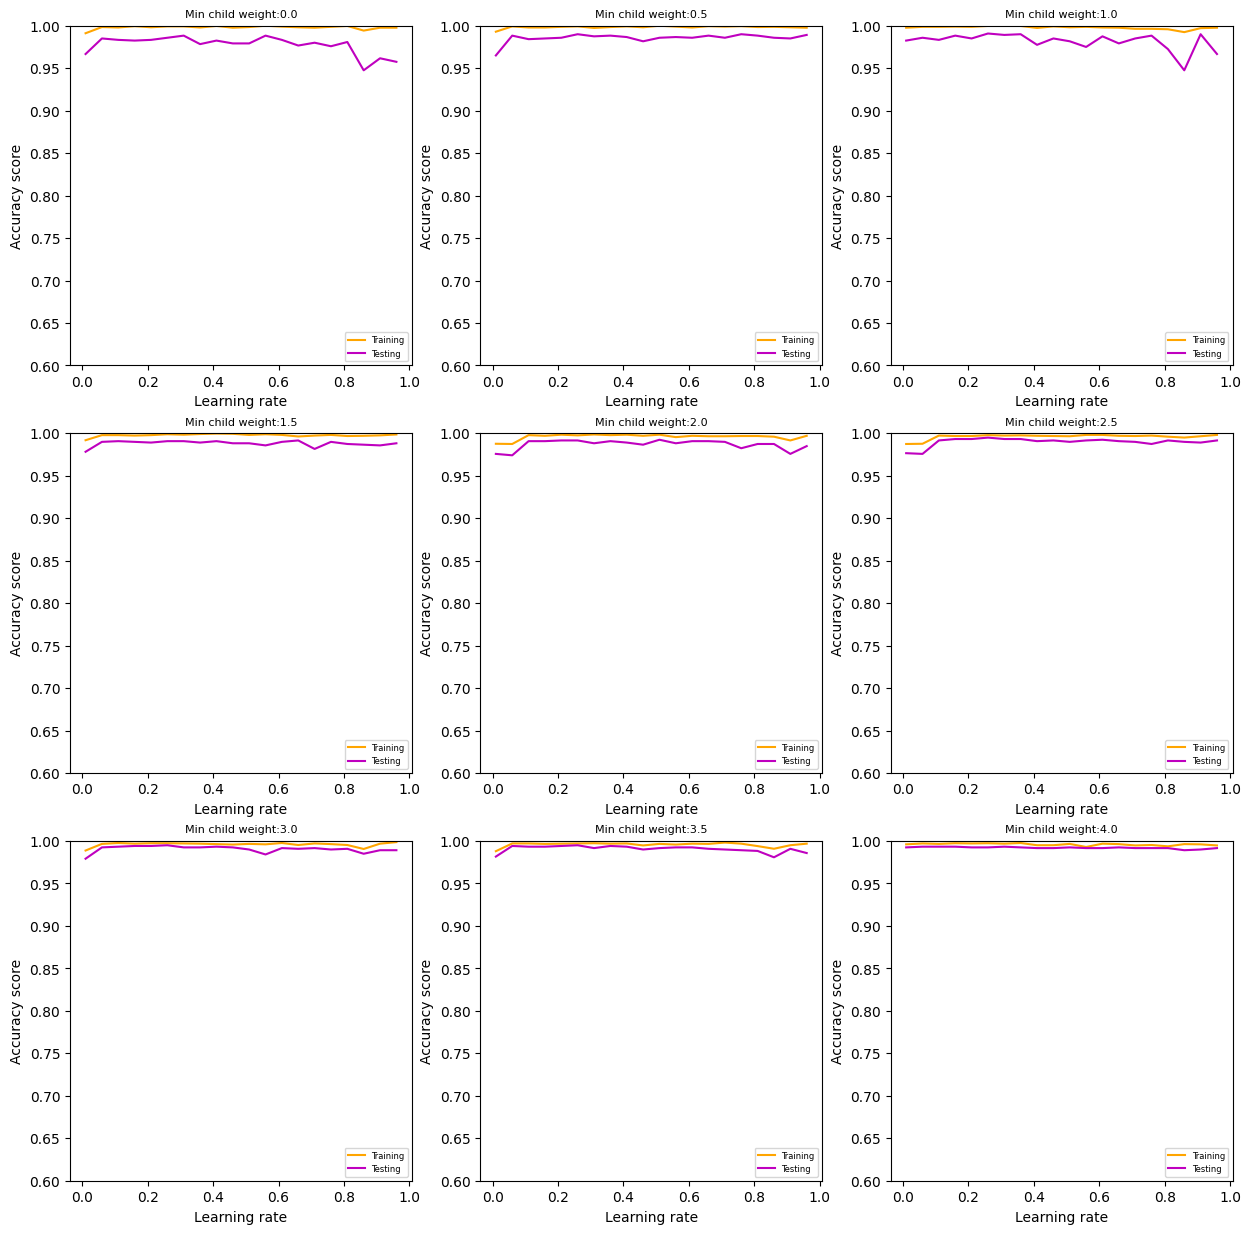

<Figure size 4000x3000 with 0 Axes>

In [46]:
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
idx = 0
fig = plt.figure(figsize=(40, 30))
learning_rate_range = np.arange(0.01, 1, 0.05)
for weight in np.arange(0, 4.5, 0.5):
    train = []
    test = []
    for lr in learning_rate_range:
        xgb_classifier = XGBClassifier(n_estimators=500,
                                       use_label_encoder=False,
                                       eval_metric="logloss",
                                       early_stopping_rounds=5,
                                       n_jobs=-1,
                                       eta=lr,
                                       reg_lambda=1,
                                       min_child_weight=weight)
        xgb_classifier.fit(X_train, y_train,
                           eval_set=[(X_val, y_val)],
                           verbose=False)
        train.append(xgb_classifier.score(X_train, y_train))
        test.append(xgb_classifier.score(X_test, y_test))

    row_idx = idx // 3
    col_idx = idx % 3
    axs[row_idx, col_idx].plot(learning_rate_range, train, c='orange', label='Training')
    axs[row_idx, col_idx].plot(learning_rate_range, test, c='m', label='Testing')
    axs[row_idx, col_idx].set_xlabel('Learning rate')
    axs[row_idx, col_idx].set_ylabel('Accuracy score')
    axs[row_idx, col_idx].set_ylim(0.6, 1)
    axs[row_idx, col_idx].legend(prop={'size': 6}, loc='lower right')
    title = "Min child weight:" + str(weight)
    axs[row_idx, col_idx].set_title(title, size=8)
    idx += 1

plt.tight_layout()
plt.show()

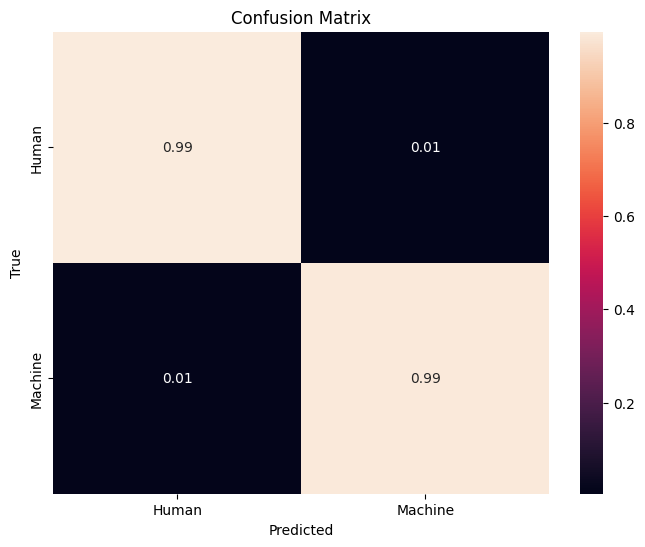

In [47]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = xgb_classifier.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=['Human', 'Machine'], yticklabels=['Human', 'Machine'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show(block=False)

# Test on paraphrased chatGPT

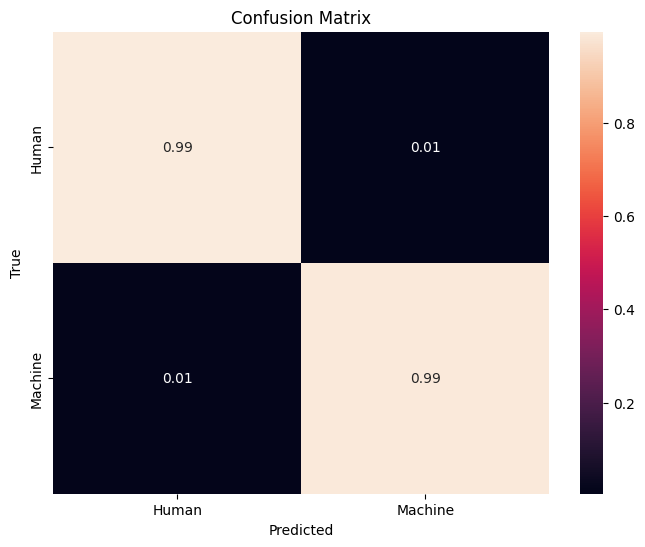

In [49]:
gpt_para_path = '/Users/supriyaupadhyaya/Library/Mobile Documents/com~apple~CloudDocs/OVGU/project-generative-text-detector/generative-text-detectors/feature-extractor/features/m4/arxiv_chatGPT_paraphrased_test_feature.csv'
X_gpt_para, y_gpt_para = get_dataset(gpt_para_path)
y_pred = xgb_classifier.predict(X_gpt_para)

# Compute confusion matrix
cm = confusion_matrix(y_gpt_para, y_pred)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=['Human', 'Machine'], yticklabels=['Human', 'Machine'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Test on M4 Bloomz

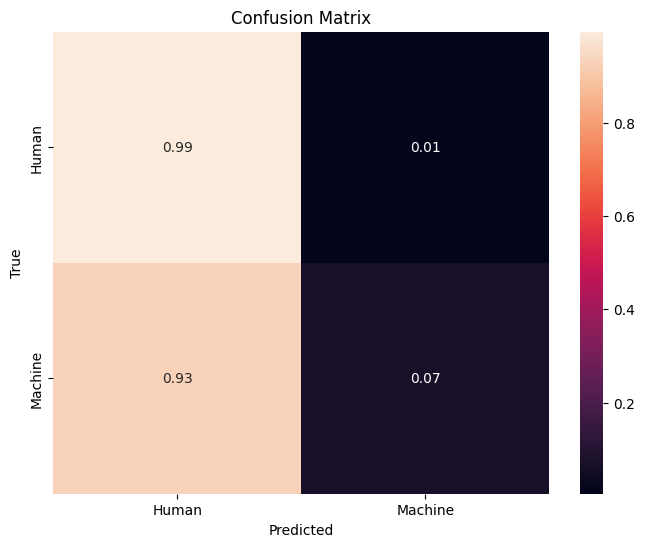

In [48]:
bloomz_path = '/Users/supriyaupadhyaya/Library/Mobile Documents/com~apple~CloudDocs/OVGU/project-generative-text-detector/generative-text-detectors/feature-extractor/features/m4/arxiv_bloomz_test_feature.csv'
X_bloomz, y_bloomz = get_dataset(bloomz_path)
y_pred = xgb_classifier.predict(X_bloomz)

# Compute confusion matrix
cm = confusion_matrix(y_bloomz, y_pred)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=['Human', 'Machine'], yticklabels=['Human', 'Machine'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## Test on cohere

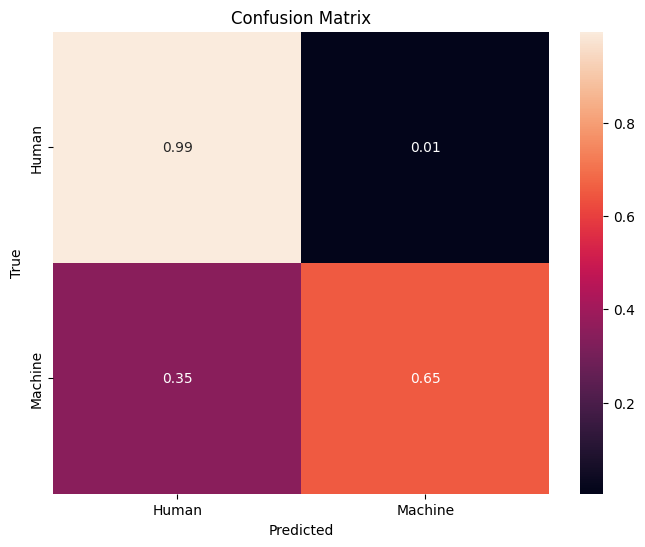

In [50]:
path = '/Users/supriyaupadhyaya/Library/Mobile Documents/com~apple~CloudDocs/OVGU/project-generative-text-detector/generative-text-detectors/feature-extractor/features/m4/arxiv_cohere_test_feature.csv'
X, y = get_dataset(path)

y_pred = xgb_classifier.predict(X)

# Compute confusion matrix
cm = confusion_matrix(y, y_pred)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=['Human', 'Machine'], yticklabels=['Human', 'Machine'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## Test on Davinci

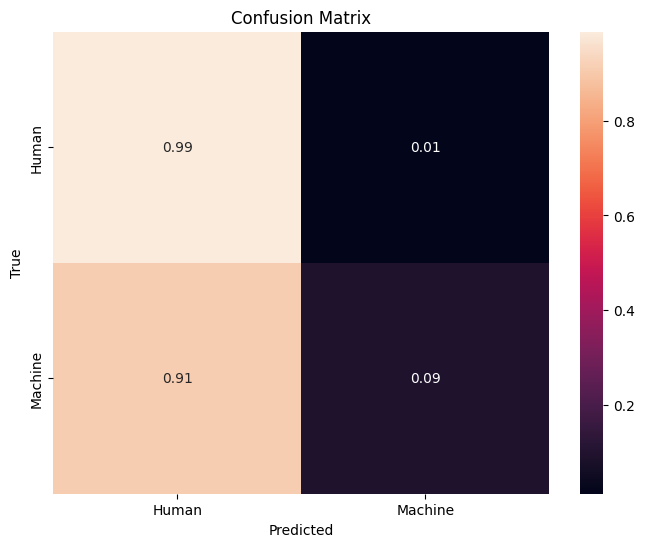

In [51]:
path = '/Users/supriyaupadhyaya/Library/Mobile Documents/com~apple~CloudDocs/OVGU/project-generative-text-detector/generative-text-detectors/feature-extractor/features/m4/arxiv_davinci_test_feature.csv'
X, y = get_dataset(path)

y_pred = xgb_classifier.predict(X)

# Compute confusion matrix
cm = confusion_matrix(y, y_pred)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=['Human', 'Machine'], yticklabels=['Human', 'Machine'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## Test on Flant5

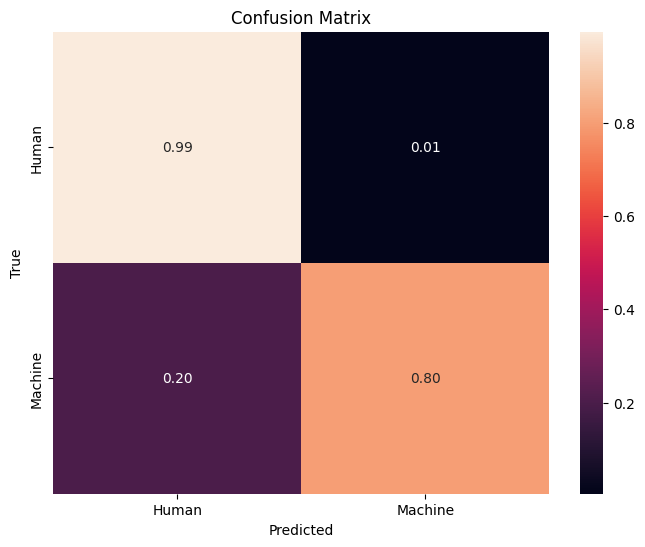

In [52]:
path = '/Users/supriyaupadhyaya/Library/Mobile Documents/com~apple~CloudDocs/OVGU/project-generative-text-detector/generative-text-detectors/feature-extractor/features/m4/arxiv_flant5_test_feature.csv'
X, y = get_dataset(path)

y_pred = xgb_classifier.predict(X)

# Compute confusion matrix
cm = confusion_matrix(y, y_pred)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=['Human', 'Machine'], yticklabels=['Human', 'Machine'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()